In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1.Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks): zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110], ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832]. Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.


In [9]:
zp = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110], dtype=np.float64)
ks = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832], dtype=np.float64)
b = (np.mean(zp * ks) - np.mean(zp) * np.mean(ks)) / (np.mean(zp**2) - np.mean(zp) ** 2)
a = np.mean(ks) - b * np.mean(zp)
print(f"Уравнение линейной регрессии: y = {a:.4f} + {b:.4f}*x")

Уравнение линейной регрессии: y = 444.1774 + 2.6205*x


In [44]:
from numpy.linalg import inv

X = zp.reshape((len(zp), 1))
y = ks.reshape((len(ks), 1))
B = inv(X.T@X)@X.T@y # (np.dot(inv(np.dot(X.T, X)), X.T))@y
print(f"Линейное урванение без коэффициента пересечения с OY: y = {B[0,0]:.4f}x")

Линейное урванение без коэффициента пересечения с OY: y = 5.8898x


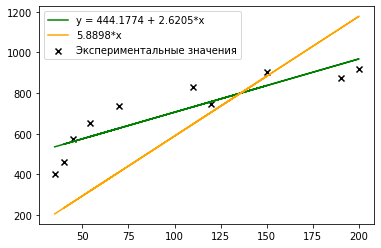

In [45]:
plt.scatter(zp, ks, marker='x', color='black', label='Экспериментальные значения')
plt.plot(zp, (a + b*zp), color='green', label=f'y = {a:.4f} + {b:.4f}*x')
plt.plot(zp, (B[0,0]*zp), color='orange', label=f'{B[0,0]:.4f}*x')
plt.legend()
plt.show()

In [49]:
# С дополнительной единицей в матрице признаков
X = zp.reshape((len(zp), 1))
y = ks.reshape((len(ks), 1))
X = np.hstack([np.ones((len(zp), 1)), X])
B = inv(X.T@X)@X.T@y 
print(B)

# Значения идентичны значениям выше

[[444.17735732]
 [  2.62053888]]


2.Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).


In [97]:
def mse_(B1, y=ks, X=zp, n=len(zp)):
    return np.sum((B1*X - y)**2)/n

eps = 1e-5
B1 = 1
alpha = 0.00001
maxiter = 1e+5
iterno = 0
lastmse = 1e+12
while maxiter > iterno:
    
    B1 -= alpha*(2/len(zp)) * np.sum((B1*zp - ks)* zp)
    lost = mse_(B1)
    if iterno%10 == 0:
        print(f"Коэффициент {B1} при MSE = {lost} на итериации {iterno}")
    
    if np.abs(lost - lastmse) < eps:
        break
    lastmse = lost
    iterno += 1

print(f"Коэффициент линейной регрессии, посчитанный методом наименьших квадратов, равен {B1:.4f}")

Коэффициент 2.347302 при MSE = 229405.42884192182 на итериации 0
Коэффициент 5.748727835228332 при MSE = 56791.110810876475 на итериации 10
Коэффициент 5.884200938409783 при MSE = 56517.293461113455 на итериации 20
Коэффициент 5.889596605572516 при MSE = 56516.859105830044 на итериации 30
Коэффициент линейной регрессии, посчитанный методом наименьших квадратов, равен 5.8898


3. В каких случаях для вычисления доверительных интервалов и проверки статистических гипотез используется таблица значений функции Лапласа, а в каких - таблица критических точек распределения Стьюдента?


Таблица Лапласа используется в ситуации, когда случайные величины распределены нормально с известной дисперсией.
Таблица критических точек распределения Стьюдента используется, когда СВ распределены нормальной с неизвестной дисперсией.


*4. Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации)

In [103]:
X = zp.copy()
y = ks.copy()

def mse2_(b0, b1, y=y, X=X, n=len(zp)):
    return np.sum((b0 + b1*X - y)**2)/n

eps = 1e-4
b0 = 0.1
b1 = 0.1
alpha = 0.00001
maxiter = 1e+6
iterno = 0
lastmse = 1e+12
while maxiter > iterno:
    y_ = b0 + b1 * X
    b0 -= alpha * 10 * (2/len(X)) * np.sum((y_ - y)) # Множитель 10 у скорости изменения свободного коэффициента
    # Если сильно уменьшить (до 1е-5) альфа, без этого множителя программа ведёт себя не правильно - коэффициенты растут
    # С этим коэффициентом достигается сходимость на итерации 106810
    # Коэффициенты b0=442.20546084743114 b1=2.635055316495254 при MSE = 6471.400545751201 на итериации 106810
    b1 -= alpha * (2/len(X)) * np.sum((y_ - y) * X)
    lost = mse2_(b0, b1)
    if iterno%100 == 0:
        print(f"Коэффициенты b0={b0} b1={b1} при MSE = {lost} на итериации {iterno}")
    
    if np.abs(lost - lastmse) < eps:
        break
    lastmse = lost
    iterno += 1

print(f"Уравнение имеет вид y = {b0:.4f} + {b1:.4f}*x")

Коэффициенты b0=0.23993199999999998 b1=1.6950780000000003 при MSE = 298669.91957656574 на итериации 0
Коэффициенты b0=2.792287935351754 b1=5.869866290895501 при MSE = 55889.61463263503 на итериации 100
Коэффициенты b0=5.024745260773698 b1=5.8534316960737796 при MSE = 55390.96953975293 на итериации 200
Коэффициенты b0=7.245911162775426 b1=5.8370802248874645 при MSE = 54897.35582994633 на итериации 300
Коэффициенты b0=9.455842751627953 b1=5.820811456910123 при MSE = 54408.72273601425 на итериации 400
Коэффициенты b0=11.654596848747365 b1=5.804624973841732 при MSE = 53925.02000300224 на итериации 500
Коэффициенты b0=13.842229988155834 b1=5.788520359497964 при MSE = 53446.19788303385 на итериации 600
Коэффициенты b0=16.01879841793521 b1=5.772497199799489 при MSE = 52972.20713019402 на итериации 700
Коэффициенты b0=18.18435810167325 b1=5.756555082761327 при MSE = 52502.998995464426 на итериации 800
Коэффициенты b0=20.338964719902535 b1=5.7406935984822525 при MSE = 52038.525221709504 на итер

Коэффициенты b0=174.2745900330794 b1=4.607471654282895 при MSE = 24949.271540833306 на итериации 9800
Коэффициенты b0=175.63971643127203 b1=4.597422056031089 при MSE = 24762.817865864065 на итериации 9900
Коэффициенты b0=176.99793823155434 b1=4.5874232870909015 при MSE = 24578.24552869998 на итериации 10000
Коэффициенты b0=178.34929035631325 b1=4.577475090375543 при MSE = 24395.535546438558 на итериации 10100
Коэффициенты b0=179.6938075513037 b1=4.567577210098532 при MSE = 24214.66912771678 на итериации 10200
Коэффициенты b0=181.03152438654195 b1=4.557729391767117 при MSE = 24035.62767077861 на итериации 10300
Коэффициенты b0=182.3624752571944 b1=4.547931382175731 при MSE = 23858.392761561663 на итериации 10400
Коэффициенты b0=183.68669438446216 b1=4.538182929399478 при MSE = 23682.946171803487 на итериации 10500
Коэффициенты b0=185.00421581646063 b1=4.528483782787666 при MSE = 23509.269857166782 на итериации 10600
Коэффициенты b0=186.3150734290954 b1=4.5188336929573465 при MSE = 23337

Коэффициенты b0=279.96914679461514 b1=3.8293841202184575 при MSE = 13310.320852195558 на итериации 19600
Коэффициенты b0=280.7996864932032 b1=3.8232699682146314 при MSE = 13241.305452158218 на итериации 19700
Коэффициенты b0=281.626025450618 b1=3.8171867406447686 при MSE = 13172.986424993409 на итериации 19800
Коэффициенты b0=282.448184913558 b1=3.811134281097868 при MSE = 13105.356744223292 на итериации 19900
Коэффициенты b0=283.2661860212592 b1=3.8051124339540343 при MSE = 13038.409454267963 на итериации 20000
Коэффициенты b0=284.0800498060382 b1=3.7991210443804757 при MSE = 12972.1376697301 на итериации 20100
Коэффициенты b0=284.8897971938334 b1=3.793159958327518 при MSE = 12906.534574686773 на итериации 20200
Коэффициенты b0=285.69544900474335 b1=3.7872290225246474 при MSE = 12841.59342198845 на итериации 20300
Коэффициенты b0=286.49702595356234 b1=3.7813280844765647 при MSE = 12777.307532565015 на итериации 20400
Коэффициенты b0=287.29454865031084 b1=3.775456992459276 при MSE = 12

Коэффициенты b0=362.199257911757 b1=3.2240338888973117 при MSE = 8175.146260716751 на итериации 33300
Коэффициенты b0=362.61389044296453 b1=3.220981504615328 при MSE = 8157.945329322732 на итериации 33400
Коэффициенты b0=363.02642582704124 b1=3.217944558820335 при MSE = 8140.917957192287 на итериации 33500
Коэффициенты b0=363.436874671033 b1=3.214922973426853 при MSE = 8124.062393093605 на итериации 33600
Коэффициенты b0=363.84524752833636 b1=3.2119166707443516 при MSE = 8107.376903465012 на итериации 33700
Коэффициенты b0=364.25155489897077 b1=3.208925573475243 при MSE = 8090.859772236652 на итериации 33800
Коэффициенты b0=364.6558072298474 b1=3.2059496047129037 при MSE = 8074.509300654024 на итериации 33900
Коэффициенты b0=365.05801491503985 b1=3.202988687939685 при MSE = 8058.323807103181 на итериации 34000
Коэффициенты b0=365.4581882960488 b1=3.2000427470249613 при MSE = 8042.301626937928 на итериации 34100
Коэффициенты b0=365.8563376620698 b1=3.1971117062231573 при MSE = 8026.4411

Коэффициенты b0=411.1016024845335 b1=2.864031388631865 при MSE = 6747.92505037585 на итериации 51200
Коэффициенты b0=411.26889453020294 b1=2.862799841244073 при MSE = 6745.124935805667 на итериации 51300
Коэффициенты b0=411.4353404386131 b1=2.8615745228322442 при MSE = 6742.353074695233 на итериации 51400
Коэффициенты b0=411.6009444893954 b1=2.8603554018911823 при MSE = 6739.609181964073 на итериации 51500
Коэффициенты b0=411.76571094053554 b1=2.859142447075037 при MSE = 6736.892975408191 на итериации 51600
Коэффициенты b0=411.92964402848247 b1=2.8579356271965075 при MSE = 6734.204175671088 на итериации 51700
Коэффициенты b0=412.09274796825815 b1=2.8567349112260287 при MSE = 6731.542506214993 на итериации 51800
Коэффициенты b0=412.2550269535655 b1=2.8555402682909805 при MSE = 6728.9076932924245 на итериации 51900
Коэффициенты b0=412.4164851568967 b1=2.854351667674887 при MSE = 6726.29946591804 на итериации 52000
Коэффициенты b0=412.57712672963993 b1=2.8531690788166353 при MSE = 6723.71

Коэффициенты b0=428.7182448626534 b1=2.7343436332121387 при MSE = 6531.036102191638 на итериации 66200
Коэффициенты b0=428.79643465939336 b1=2.733768026407035 при MSE = 6530.424420634708 на итериации 66300
Коэффициенты b0=428.8742289842507 b1=2.733195330932007 при MSE = 6529.818911011028 на итериации 66400
Коэффициенты b0=428.9516298374602 b1=2.732625532062003 при MSE = 6529.219511045138 на итериации 66500
Коэффициенты b0=429.02863920914126 b1=2.732058615146439 при MSE = 6528.626159089918 на итериации 66600
Коэффициенты b0=429.1052590793466 b1=2.7314945656088367 при MSE = 6528.038794120292 на итериации 66700
Коэффициенты b0=429.1814914181142 b1=2.7309333689464443 при MSE = 6527.457355726914 на итериации 66800
Коэффициенты b0=429.257338185518 b1=2.73037501072986 при MSE = 6526.88178411 на итериации 66900
Коэффициенты b0=429.33280133171843 b1=2.729819476602665 при MSE = 6526.312020073128 на итериации 67000
Коэффициенты b0=429.40788279701206 b1=2.729266752281051 при MSE = 6525.74800501719

Коэффициенты b0=437.4471414250884 b1=2.6700844527068264 при MSE = 6481.904158890144 на итериации 82600
Коэффициенты b0=437.4811818148254 b1=2.6698338588851516 при MSE = 6481.7882239705 на итериации 82700
Коэффициенты b0=437.51505003354237 b1=2.6695845325282215 при MSE = 6481.673458846765 на итериации 82800
Коэффициенты b0=437.5487469520542 b1=2.6693364672253925 при MSE = 6481.559851715574 на итериации 82900
Коэффициенты b0=437.5822734367709 b1=2.669089656598447 при MSE = 6481.447390892662 на итериации 83000
Коэффициенты b0=437.61563034971977 b1=2.6688440943014315 при MSE = 6481.33606481165 на итериации 83100
Коэффициенты b0=437.6488185485688 b1=2.6685997740204854 при MSE = 6481.225862022871 на итериации 83200
Коэффициенты b0=437.68183888664794 b1=2.668356689473682 при MSE = 6481.11677119219 на итериации 83300
Коэффициенты b0=437.7146922129708 b1=2.6681148344108703 при MSE = 6481.008781099815 на итериации 83400
Коэффициенты b0=437.7473793722571 b1=2.6678742026135107 при MSE = 6480.90188

Коэффициенты b0=439.95621947087915 b1=2.6516134698176197 при MSE = 6474.934004206752 на итериации 91800
Коэффициенты b0=439.9775693324313 b1=2.651456299366873 при MSE = 6474.888398903912 на итериации 91900
Коэффициенты b0=439.9988112096902 b1=2.6512999238599244 при MSE = 6474.8432537635235 на итериации 92000
Коэффициенты b0=440.01994564882307 b1=2.6511443392760765 при MSE = 6474.798564142502 на итериации 92100
Коэффициенты b0=440.0409731932362 b1=2.650989541614956 при MSE = 6474.754325444601 на итериации 92200
Коэффициенты b0=440.06189438358575 b1=2.6508355268964356 при MSE = 6474.710533119969 на итериации 92300
Коэффициенты b0=440.0827097577947 b1=2.650682291160508 при MSE = 6474.667182664635 на итериации 92400
Коэффициенты b0=440.1034198510646 b1=2.6505298304672014 при MSE = 6474.624269620098 на итериации 92500
Коэффициенты b0=440.12402519588994 b1=2.650378140896471 при MSE = 6474.581789572834 на итериации 92600
Коэффициенты b0=440.14452632207264 b1=2.650227218548095 при MSE = 6474.5

Коэффициенты b0=441.92643402179533 b1=2.6371094174948597 при MSE = 6471.699434070795 на итериации 104200
Коэффициенты b0=441.9378188432683 b1=2.637025606294576 при MSE = 6471.686465931486 на итериации 104300
Коэффициенты b0=441.94914608207716 b1=2.636942218998365 при MSE = 6471.6736286421055 на итериации 104400
Коэффициенты b0=441.9604160294663 b1=2.6368592534621853 при MSE = 6471.6609208823675 на итериации 104500
Коэффициенты b0=441.97162897520695 b1=2.636776707552838 при MSE = 6471.648341345304 на итериации 104600
Коэффициенты b0=441.9827852076049 b1=2.6366945791479144 при MSE = 6471.635888737136 на итериации 104700
Коэффициенты b0=441.99388501350666 b1=2.6366128661357466 при MSE = 6471.6235617771345 на итериации 104800
Коэффициенты b0=442.0049286783093 b1=2.6365315664153384 при MSE = 6471.6113591974945 на итериации 104900
Коэффициенты b0=442.0159164859658 b1=2.636450677896325 при MSE = 6471.599279743207 на итериации 105000
Коэффициенты b0=442.0268487189926 b1=2.6363701984989154 при 